In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/Myself/OneDrive/Desktop/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

In [6]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [7]:
# Checking Missing Values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data1=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [10]:
data1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data1['Current_Year']=2020

In [12]:
data1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [13]:
data1['no_of_years']=data1['Current_Year']-data1['Year']

In [14]:
data1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [15]:
data1.drop(['Year'],axis=1,inplace=True)

In [16]:
data1.drop(['Current_Year'],axis=1,inplace=True)

In [17]:
data1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [18]:
data1=pd.get_dummies(data1,drop_first=True)

In [19]:
data1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [20]:
data1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


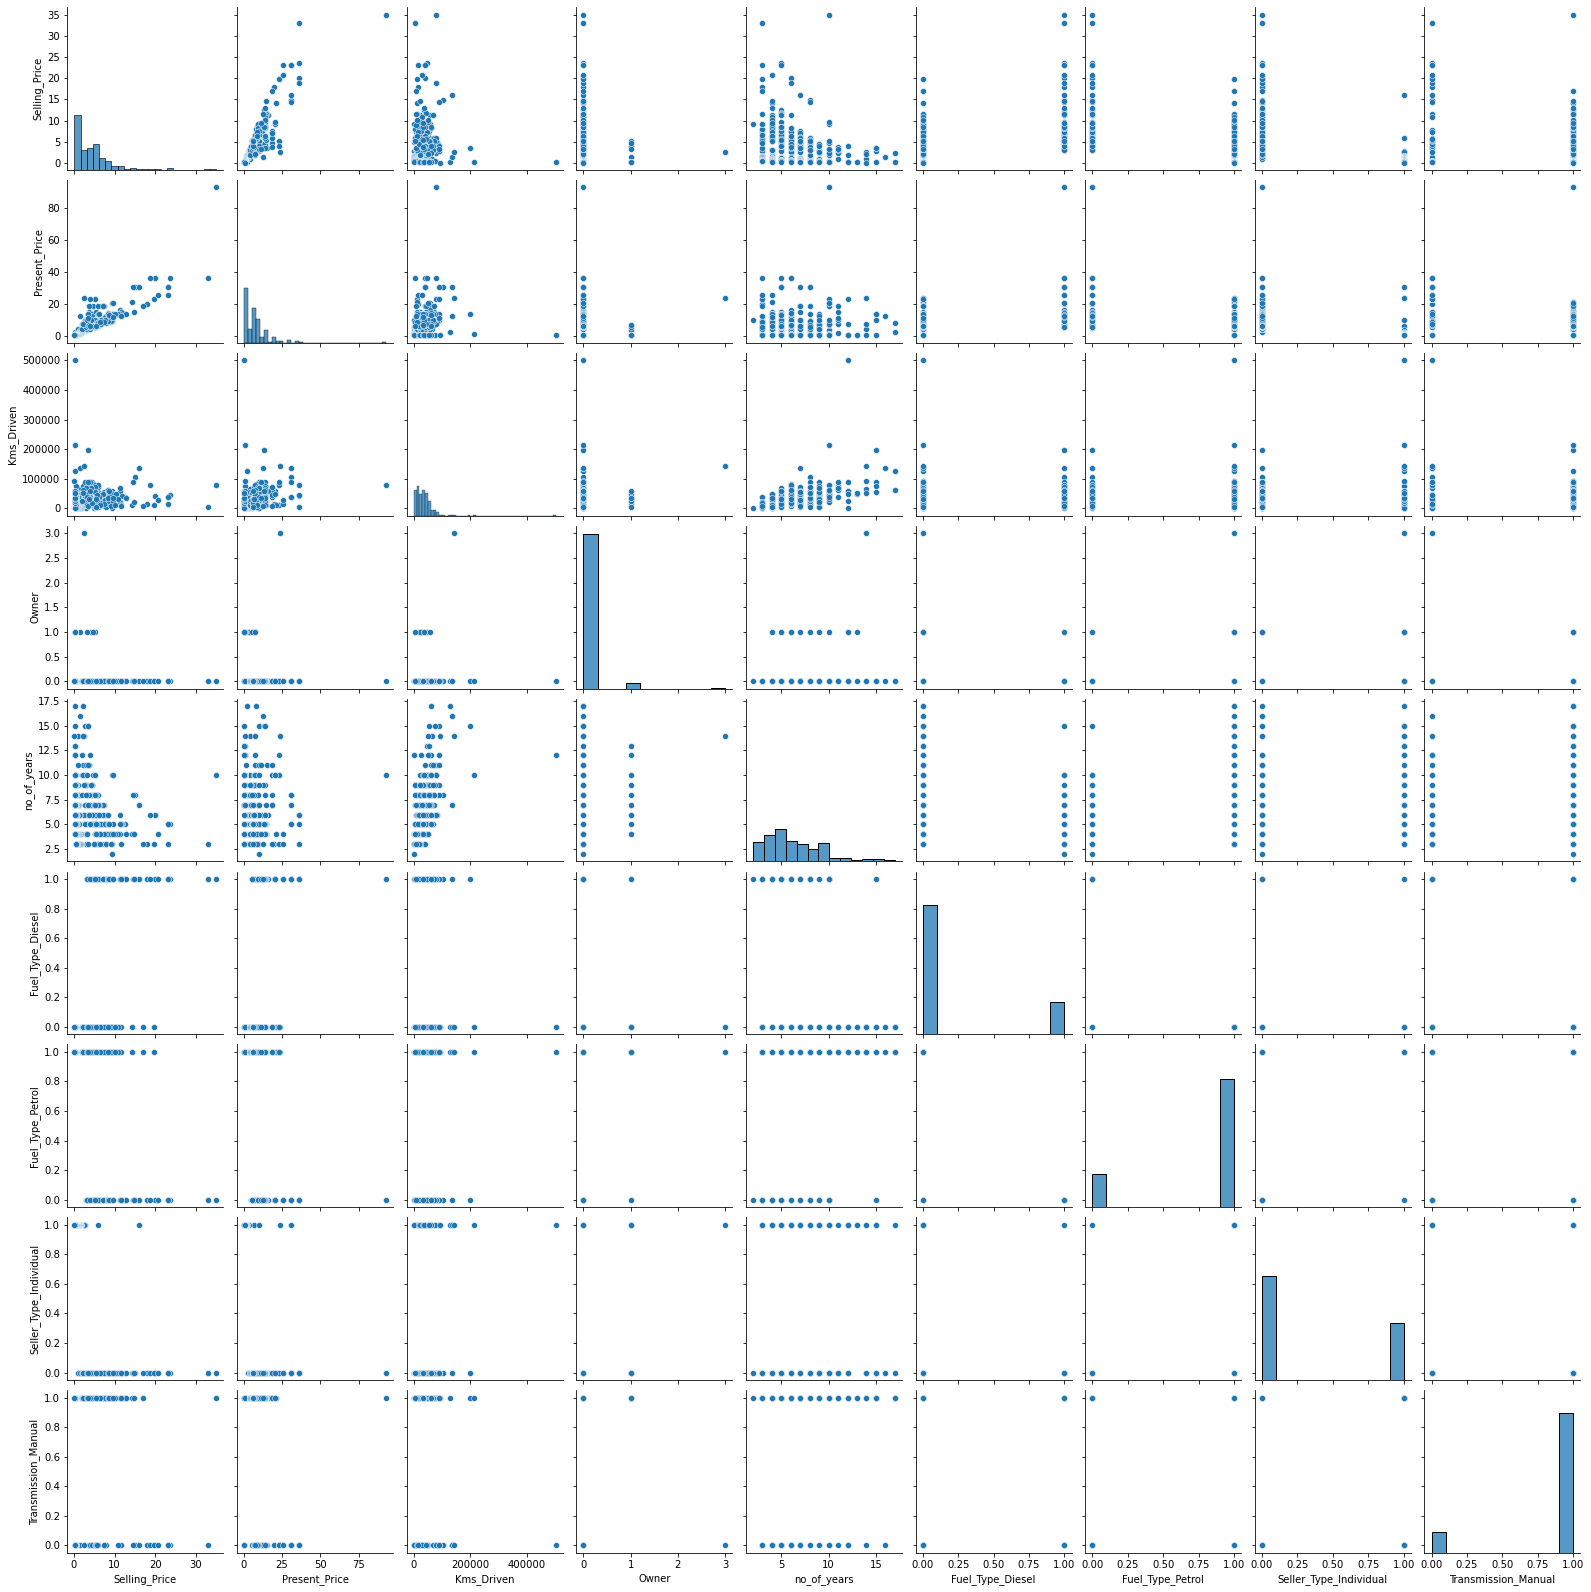

In [21]:
sns.pairplot(data1)

<AxesSubplot:>

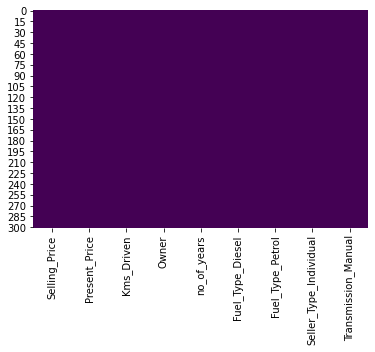

In [22]:
sns.heatmap(data1.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

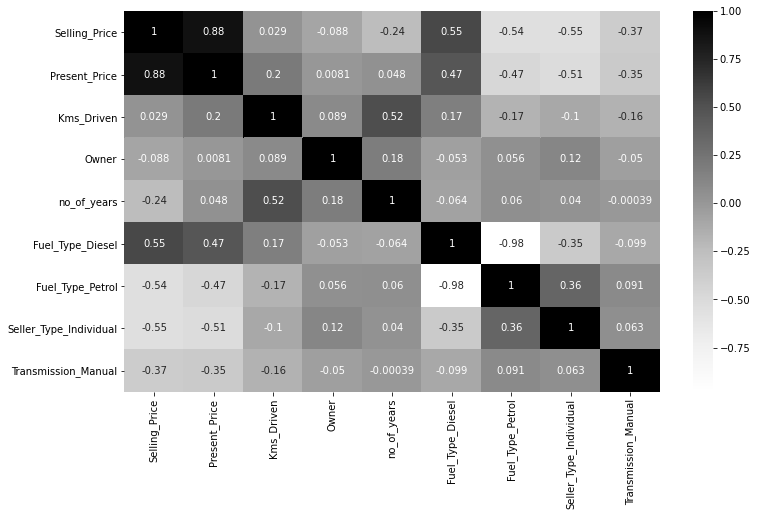

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(data1.corr(),cbar=True,annot=True,cmap='Greys')

Text(0, 0.5, 'Selling_Price')

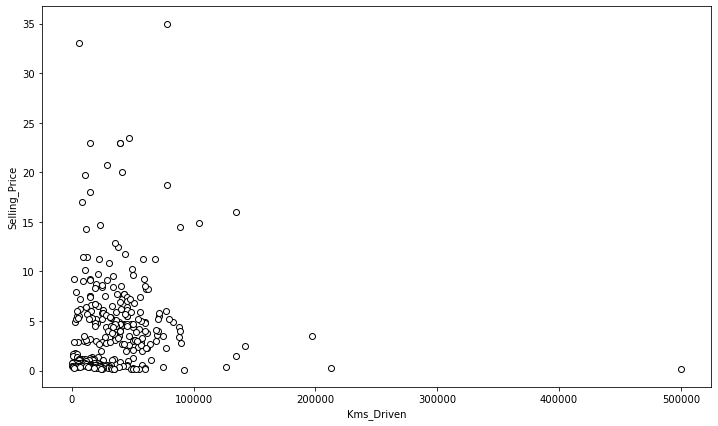

In [24]:
plt.figure(figsize=(12,7))
plt.scatter(x='Kms_Driven',y='Selling_Price',data=data1,color='w',edgecolor='k',linewidths=1)
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')

<AxesSubplot:xlabel='Kms_Driven', ylabel='Count'>

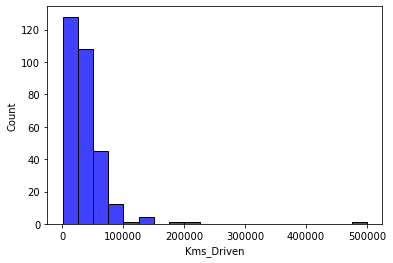

In [25]:
sns.histplot(data1.Kms_Driven,bins=20,color='blue')

Text(0, 0.5, 'Selling_Price')

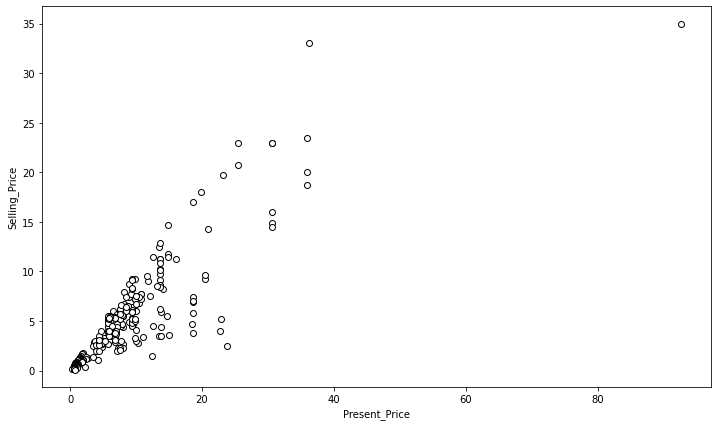

In [26]:
plt.figure(figsize=(12,7))
plt.scatter(x='Present_Price',y='Selling_Price',data=data1,color='w',edgecolor='k',linewidths=1)
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')

<AxesSubplot:xlabel='Present_Price', ylabel='Count'>

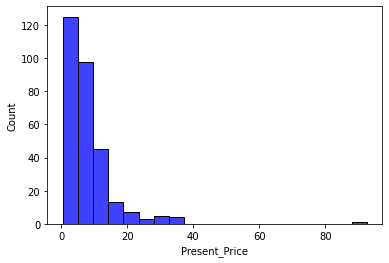

In [27]:
sns.histplot(df.Present_Price,bins=20,color='blue')

In [65]:
data1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,6,0,1,0,1
1,4.75,9.54,43000.0,0,7,1,0,0,1
2,7.25,9.85,6900.0,0,3,0,1,0,1
3,2.85,4.15,5200.0,0,9,0,1,0,1
4,4.60,6.87,42450.0,0,6,1,0,0,1


In [68]:
df['Fuel_Type']=data1['Fuel_Type_Diesel'].astype('object')
df['Fuel_Type']=data1['Fuel_Type_Petrol'].astype('object')
df['Seller_Type']=data1['Seller_Type_Individual'].astype('object')
df['Transmission']=data1['Transmission_Manual'].astype('object')

In [69]:
df['Selling_Price']=data1['Selling_Price'].astype('int64')
df['Present_Price']=data1['Present_Price'].astype('int64')
df['Kms_Driven']=data1['Kms_Driven'].astype('int64')

In [70]:
df['Owner']=data1['Owner'].astype('object')

In [71]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    float64
 3   Owner                   301 non-null    int64  
 4   no_of_years             301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 13.1 KB


In [48]:
categorical=data1.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

0


Index([], dtype='object')

In [49]:
numerical=data1.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

9


Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'no_of_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

<AxesSubplot:xlabel='Fuel_Type_Petrol', ylabel='count'>

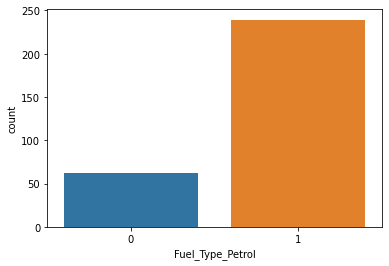

In [51]:
sns.countplot(data1.Fuel_Type_Petrol)

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

<AxesSubplot:title={'center':'Seller Type_Individual'}>

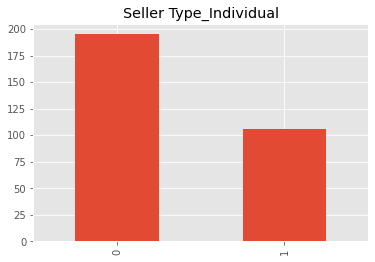

In [58]:
data1['Seller_Type_Individual'].value_counts().plot(kind='bar',title='Seller Type_Individual')

<AxesSubplot:title={'center':'Transmission_Manual'}>

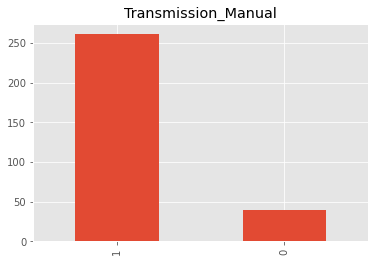

In [60]:
data1['Transmission_Manual'].value_counts().plot(kind='bar',title='Transmission_Manual')

<AxesSubplot:title={'center':'Owner'}>

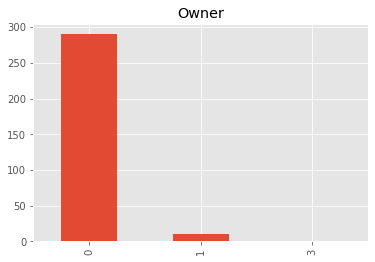

In [61]:
data1['Owner'].value_counts().plot(kind='bar',title='Owner')

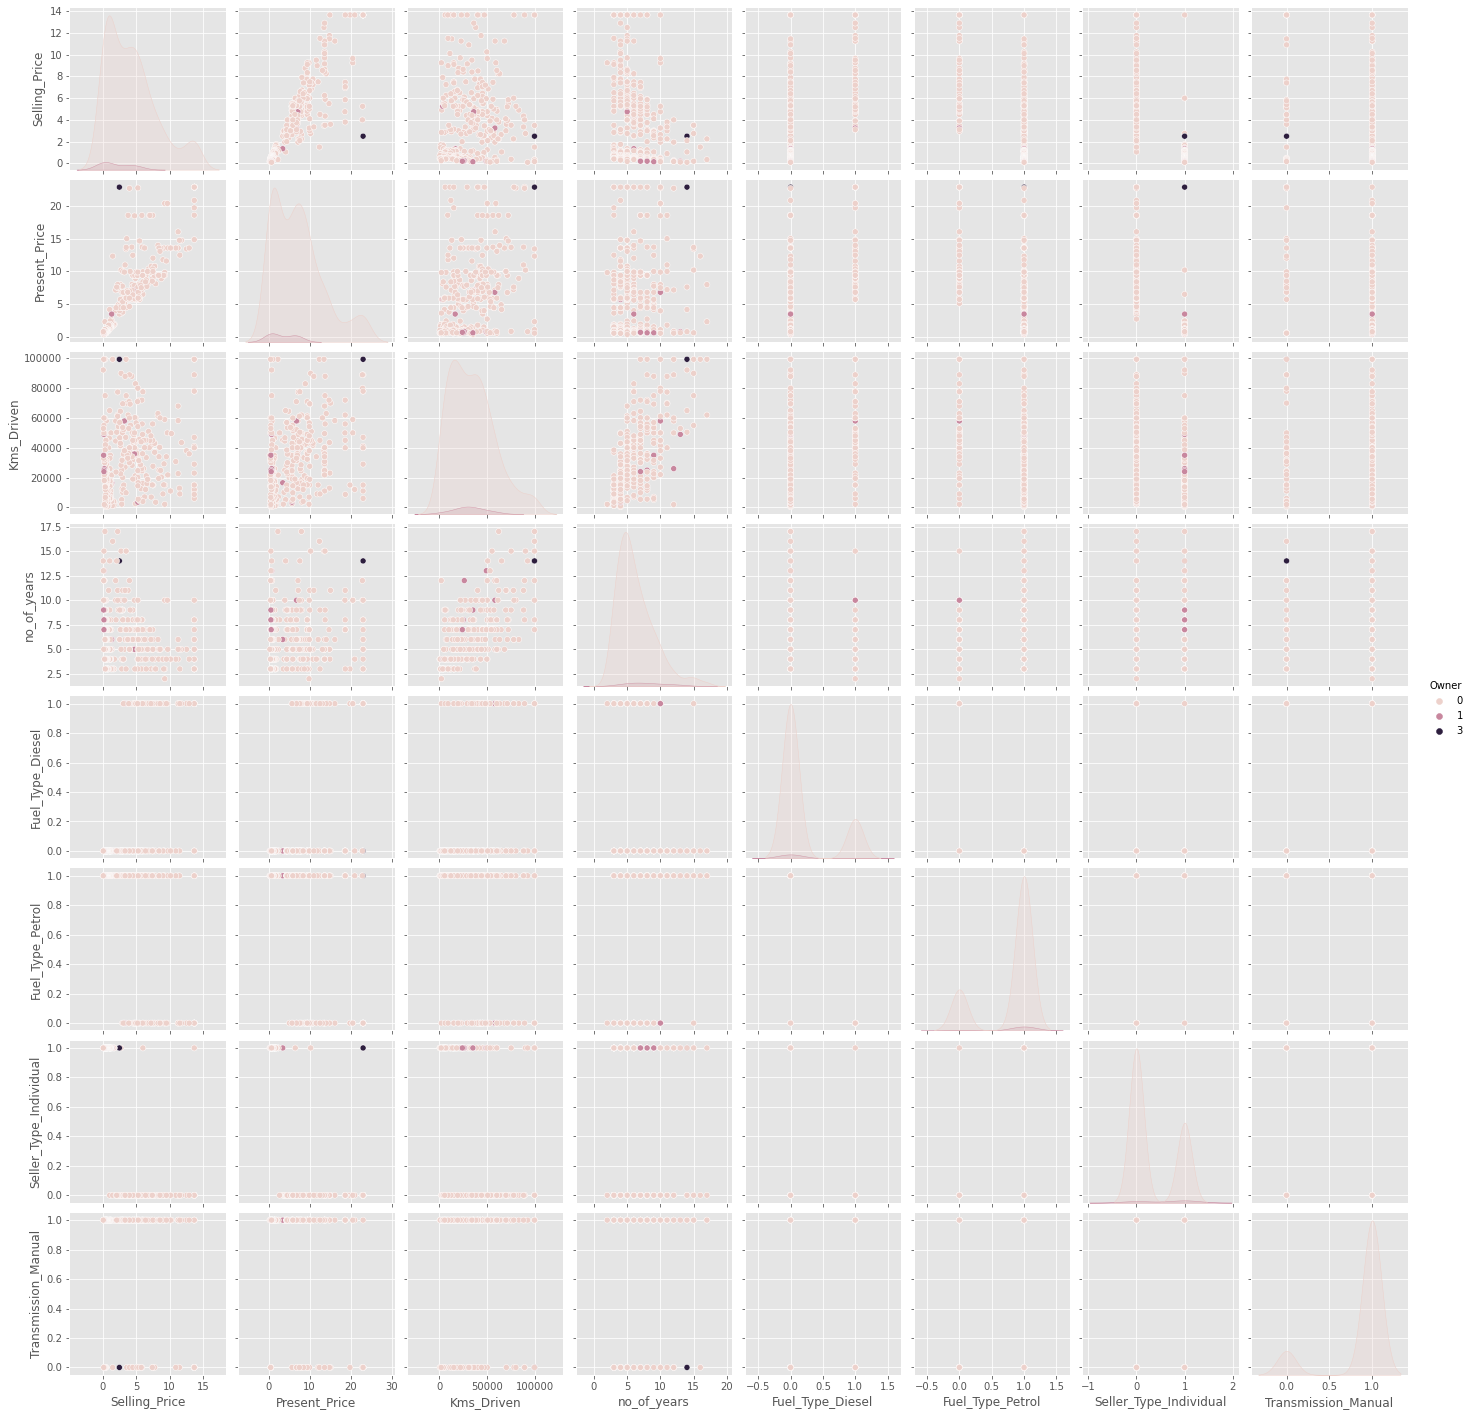

In [62]:
sns.pairplot(data1, hue="Owner")
plt.show()

# Outlier Analysis

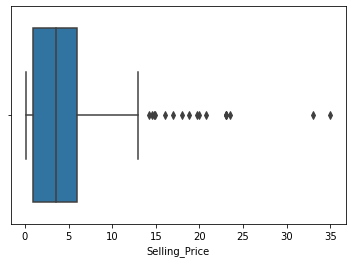

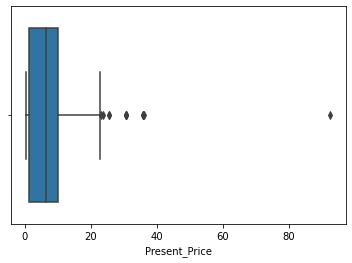

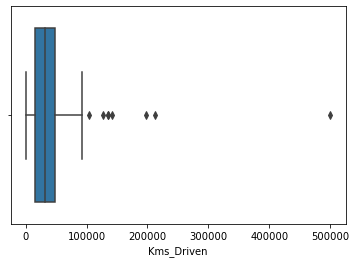

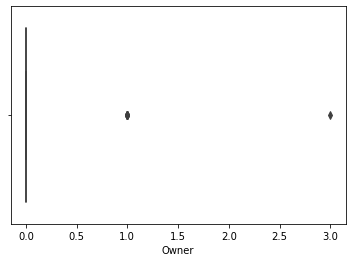

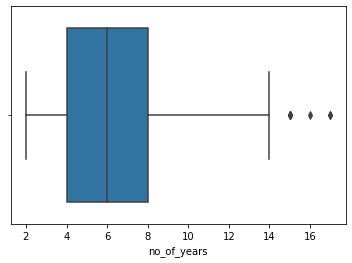

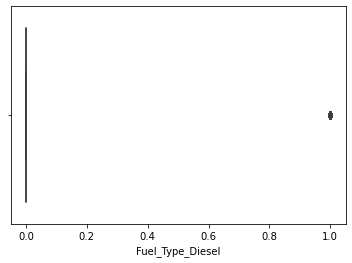

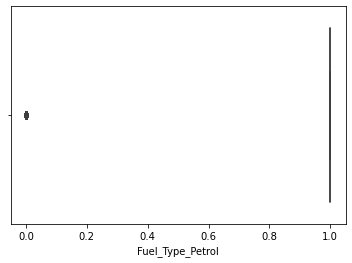

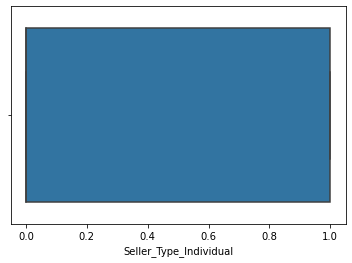

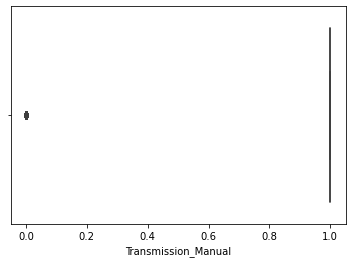

In [30]:
for col in data1._get_numeric_data():
    sns.boxplot(data1[col])
    plt.show()

In [31]:
def thresholds(dataframe, cols, q1=0.25, q3=0.75):
    for col_name in cols:
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        IQR = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * IQR
        low_limit = quartile1 - 1.5 * IQR
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    return dataframe

In [72]:
df1=thresholds(data1, ['Selling_Price','Present_Price','Kms_Driven','Fuel_Type_Petrol','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual','Owner','no_of_years'])

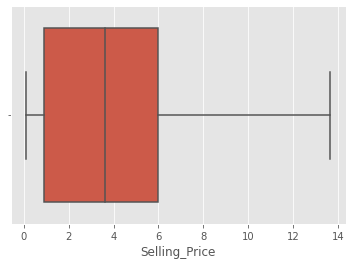

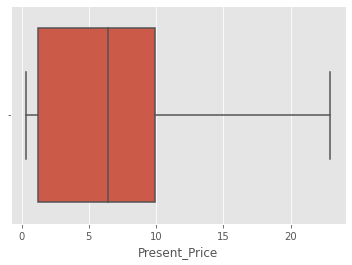

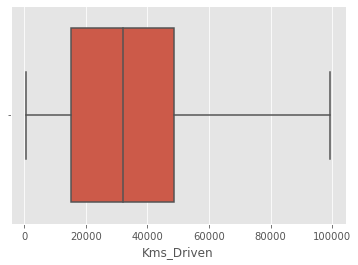

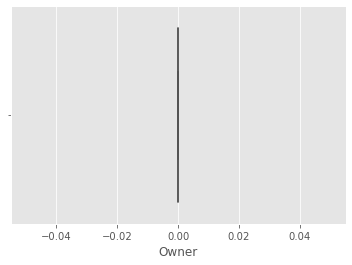

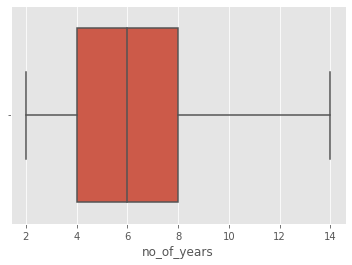

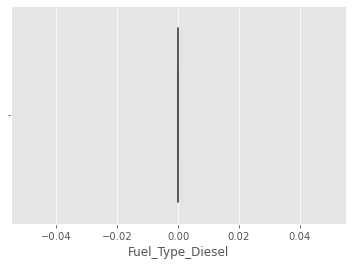

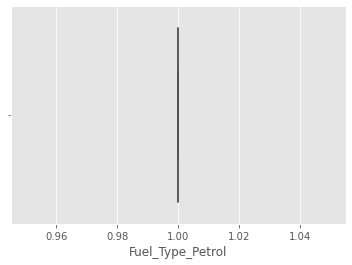

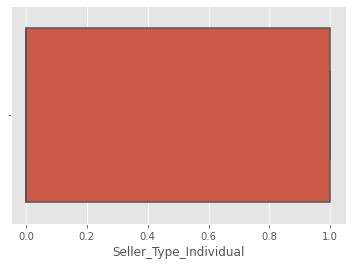

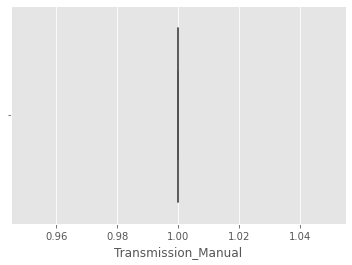

In [73]:
for col in df1._get_numeric_data():
    sns.boxplot(df1[col])
    plt.show()

# Building Model

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

In [36]:
x=data1.iloc[:,1:]
y=data1.iloc[:,0]

In [37]:
models=[LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor()]

In [38]:
def reg_models(x, y, models):
    for model in models:
        X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.25, random_state=50)
        model.fit(X_train,Y_train)
        Y_test_pred=model.predict(X_test)
        print(model)
        print('Mean Squared Error: {}'.format(mean_squared_error(Y_test, Y_test_pred)))
        print('Regression Score(r2): {}'.format(r2_score(Y_test, Y_test_pred)))
        print('')

In [39]:
reg_models(x,y, models)

LinearRegression()
Mean Squared Error: 1.6623712610122316
Regression Score(r2): 0.8643332512410539

Lasso()
Mean Squared Error: 1.9619046485002662
Regression Score(r2): 0.8398882179453561

Ridge()
Mean Squared Error: 1.6514130528291897
Regression Score(r2): 0.8652275547647515

DecisionTreeRegressor()
Mean Squared Error: 2.352834210526316
Regression Score(r2): 0.8079843082004662



# HyperParameter Tuning

In [40]:
model_parameters={
    'Linear Regression':{
        'model': LinearRegression(),
        'params': {'fit_intercept': [True , False],
                   'normalize': [True, False], 
                    }},
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'selection': ['cyclic', 'random'], 
                  'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]}},
    'Ridge Regression' : {
        'model': Ridge(),
        'params': {'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1], 
                   'solver': ['auto', 'svd', 'cholesky']}},
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                   'splitter': ['best', 'random']}}, 
}

In [41]:
def tuning(x, y, model_params):
    results=[]
    for model_name, mp in model_params.items():
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=50)
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_test_pred=clf.predict(X_test)
        test_error=mean_squared_error(Y_test, Y_test_pred)
        r2score=r2_score(Y_test, Y_test_pred)                                                  
        print(model_name)
        print('Mean Squared Error: {}'.format(test_error))
        print('Regression Score(r2): {}'.format(r2score))
        print('------------------------------------------------------')
        results.append({'model': model_name, 
                        'MSE': test_error,
                        'R2 Score': r2score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
    return results

In [42]:
result = tuning(x,y, model_parameters)

Linear Regression
Mean Squared Error: 1.662371261012242
Regression Score(r2): 0.8643332512410531
------------------------------------------------------
Lasso Regression
Mean Squared Error: 1.556939092222004
Regression Score(r2): 0.8729376105017312
------------------------------------------------------
Ridge Regression
Mean Squared Error: 1.6514130528291897
Regression Score(r2): 0.8652275547647515
------------------------------------------------------
DecisionTreeRegressor
Mean Squared Error: 2.4363868421052635
Regression Score(r2): 0.801165546265381
------------------------------------------------------


In [43]:
res = pd.DataFrame(result)

In [44]:
res_sorted=res.sort_values('R2 Score', ascending = False)
res_sorted

,model,MSE,R2 Score,best_score,best_params
1,Lasso Regression,1.556939,0.872938,0.876220,"{'alpha': 0.05, 'selection': 'cyclic'}"
2,Ridge Regression,1.651413,0.865228,0.875202,"{'alpha': 1, 'solver': 'auto'}"
0,Linear Regression,1.662371,0.864333,0.874716,"{'fit_intercept': True, 'normalize': True}"
3,DecisionTreeRegressor,2.436387,0.801166,0.932539,"{'criterion': 'mse', 'splitter': 'best'}"


In [45]:
res_sorted.to_csv('result.csv',index=False)

# Final Model

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=50)
model=Lasso(alpha=1, selection='cyclic')
model.fit(X_train, Y_train)
Y_test_pred=model.predict(X_test)
test_error=mean_squared_error(Y_test, Y_test_pred)
r2score=r2_score(Y_test, Y_test_pred) 
print('Mean Squared Error: {}'.format(test_error))
print('Regression Score(r2): {}'.format(r2score))

Mean Squared Error: 1.9619046485002662
Regression Score(r2): 0.8398882179453561
